<center><font size=4 style="color:#BA4A00"><strong>文本统计量</strong></font></center>

### 1. 文本词汇丰富度

使用前文构建的中文新闻语料库中演示文本统计量。

In [1]:
from nltk.corpus.reader import CategorizedTaggedCorpusReader

In [2]:
creader = CategorizedTaggedCorpusReader('./cn_news_tagged/', '.*',cat_pattern = r'(.+)/.+txt')

In [3]:
creader.categories()

['Culture',
 'Education',
 'Finance',
 'Health',
 'IT',
 'Military',
 'Recruit',
 'Sports',
 'Travel']

In [4]:
it_words = creader.tagged_words(categories=['IT'])

In [5]:
cult_words = creader.tagged_words(categories=['Culture'])

In [6]:
print(len(it_words), len(cult_words))

1031858 4139502


In [7]:
print(len(set(it_words)), len(set(cult_words)))

61369 171686


In [8]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [9]:
print(lexical_diversity(it_words), lexical_diversity(cult_words))

0.05947426874628098 0.04147503733540894


### 2. 词语频率统计

计算词表中每个词语的出现频率 (数)，绘制词语累积频率分布图、词语频率分布图、词云。

In [10]:
from nltk import FreqDist

In [11]:
it_words = creader.words(categories=['IT'])

In [12]:
fdist_it = FreqDist(it_words)

In [13]:
fdist_it.most_common(50)

[('，', 65990),
 ('的', 57259),
 ('。', 32613),
 ('在', 13297),
 ('、', 11614),
 ('了', 10096),
 ('是', 8622),
 ('和', 8454),
 ('“', 8440),
 ('”', 8434),
 ('公司', 5845),
 ('将', 5510),
 ('一', 4900),
 ('中国', 4095),
 ('市场', 3962),
 ('为', 3931),
 ('也', 3769),
 ('有', 3739),
 ('不', 3394),
 ('：', 3393),
 ('上', 3231),
 ('与', 3181),
 ('对', 3130),
 ('中', 3085),
 ('这', 2834),
 ('一个', 2687),
 ('用户', 2680),
 ('产品', 2459),
 ('等', 2444),
 ('技术', 2397),
 ('服务', 2381),
 ('而', 2365),
 ('网络', 2335),
 ('到', 2323),
 ('业务', 2295),
 ('手机', 2239),
 ('我们', 2230),
 ('.', 2198),
 ('）', 2146),
 ('企业', 2128),
 ('（', 2127),
 ('就', 2109),
 ('个', 2099),
 ('表示', 2087),
 ('都', 2081),
 ('更', 2078),
 ('美元', 2071),
 ('会', 2049),
 ('大', 2037),
 ('新', 2001)]

上述高频词结果中包含了标点符号和一些无意义的单字词，下面对分词结果进行过滤，然后再计算高频词。

In [14]:
import re

In [15]:
zh_char = re.compile(r'[\u4e00-\u9fa5]')

In [16]:
with open('./stopwords.txt') as f:
    stopwords = f.read().strip().split()
    
domain_stopwords = ['记者', '报道']

In [17]:
cleaned_it_words = filter(lambda item: len(item) > 1 and zh_char.findall(item) and item not in stopwords + domain_stopwords, it_words)

In [18]:
fdist_it = FreqDist(cleaned_it_words)

In [19]:
fdist_it.most_common(50)

[('公司', 5845),
 ('中国', 4095),
 ('市场', 3962),
 ('用户', 2680),
 ('产品', 2459),
 ('技术', 2397),
 ('服务', 2381),
 ('网络', 2335),
 ('业务', 2295),
 ('手机', 2239),
 ('企业', 2128),
 ('美元', 2071),
 ('微软', 1785),
 ('发展', 1658),
 ('目前', 1640),
 ('软件', 1628),
 ('提供', 1570),
 ('美国', 1510),
 ('系统', 1432),
 ('信息', 1415),
 ('全球', 1394),
 ('第一', 1359),
 ('增长', 1331),
 ('电视', 1283),
 ('没有', 1257),
 ('北京', 1178),
 ('时间', 1157),
 ('同时', 1073),
 ('季度', 1065),
 ('管理', 1047),
 ('电信', 1041),
 ('网站', 1038),
 ('游戏', 1029),
 ('品牌', 1027),
 ('消息', 1016),
 ('推出', 1008),
 ('国家', 978),
 ('合作', 968),
 ('电子', 966),
 ('销售', 949),
 ('标准', 920),
 ('计划', 919),
 ('5月', 891),
 ('价格', 886),
 ('互联网', 882),
 ('电脑', 881),
 ('达到', 876),
 ('去年', 855),
 ('包括', 847),
 ('消费者', 838)]

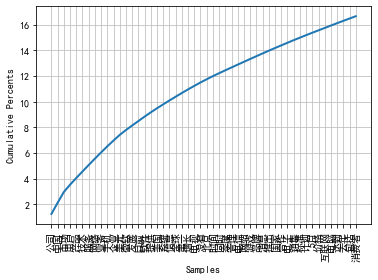

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Percents'>

In [20]:
import matplotlib.pyplot as plt
# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"] 
plt.rcParams["axes.unicode_minus"] = False
fdist_it.plot(50, cumulative=True, percents=True)

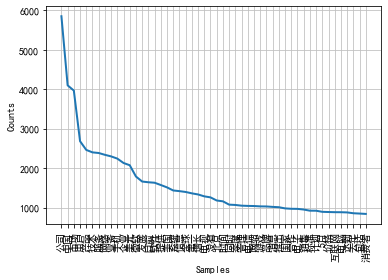

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
fdist_it.plot(50)

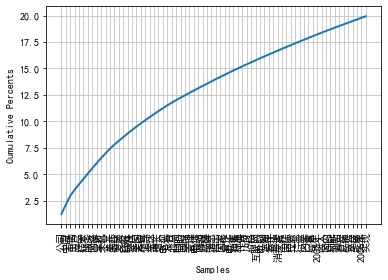

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Percents'>

In [22]:
fdist_it.plot(70, cumulative=True, percents=True)

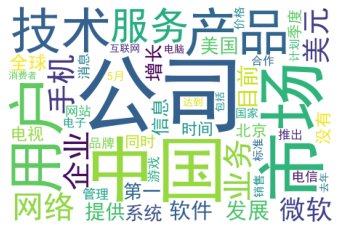

In [23]:
import wordcloud
import matplotlib.pyplot as plt

w = wordcloud.WordCloud(width=450,height=300,background_color='white',relative_scaling=0.5,font_path='./simhei.ttf')
w.fit_words(dict(fdist_it.most_common(50)))
plt.axis('off')
plt.imshow(w)
w.to_file('./word_cloud.png')

### 3. 条件频率统计

In [24]:
cq_list = [(category, word) 
 for category in creader.categories()[:4] 
 for word in filter(lambda item: len(item) > 1 and 
                    zh_char.findall(item) and 
                    item not in stopwords + domain_stopwords, 
                    creader.words(categories=[category]))
]

In [25]:
import nltk

In [26]:
cfd = nltk.ConditionalFreqDist(cq_list)

In [27]:
cfd.tabulate(samples=['得分', '货币', '心情'])

           得分  货币  心情 
  Culture   9  62 143 
Education  99  79 148 
  Finance   0 256   7 
   Health   6   0 192 


### 4. 词语搭配挖掘

In [28]:
import nltk
from nltk.collocations import *
from nltk.corpus.reader import CategorizedTaggedCorpusReader
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [29]:
creader = CategorizedTaggedCorpusReader('./cn_news_tagged/', '.*',cat_pattern = r'(.+)/.+txt')

In [30]:
IT_t = nltk.Text(creader.words(categories=['IT']))

In [31]:
finder = BigramCollocationFinder.from_words(IT_t.tokens, window_size=5)
finder.apply_freq_filter(2)
finder.apply_word_filter(lambda w: len(w) < 3)

In [32]:
finder.nbest(bigram_measures.pmi, 10)

[('PDP', '5017'),
 ('DFC', '戴卫·考尔'),
 ('ＢＥＬＬＶＩＬＬＥＳ', 'ＴＥＥＳＺＡ'),
 ('(Location', 'Free'),
 ('(Location', 'LFTV)'),
 ('(Luxe', 'Interactive)'),
 ('(Wired', 'Transmission'),
 ('01.jpg', 'target'),
 ('0800', '918-066'),
 ('1003', '95万')]

In [33]:
finder.nbest(bigram_measures.chi_sq, 10)

[('PDP', '5017'),
 ('Ready', 'Drive'),
 ('DFC', '戴卫·考尔'),
 ('ＢＥＬＬＶＩＬＬＥＳ', 'ＴＥＥＳＺＡ'),
 ('Julie', 'Ryan'),
 ('(Location', 'Free'),
 ('(Location', 'LFTV)'),
 ('(Luxe', 'Interactive)'),
 ('(Wired', 'Transmission'),
 ('01.jpg', 'target')]

In [34]:
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('Xbox', '360'),
 ('CNET', '资讯网'),
 ('Play', 'Station'),
 ('Windows', 'Live'),
 ('Core', 'Duo'),
 ('Windows', 'Vista'),
 ('巴塞罗那', '俱乐部'),
 ('Windows', 'Mobile'),
 ('Web', '2.0'),
 ('PS3', '游戏机')]

In [35]:
finder.nbest(bigram_measures.student_t, 10)

[('Xbox', '360'),
 ('Windows', 'Live'),
 ('CNET', '资讯网'),
 ('Play', 'Station'),
 ('Windows', 'Vista'),
 ('Windows', 'Mobile'),
 ('Core', 'Duo'),
 ('360', '游戏机'),
 ('PS3', '游戏机'),
 ('Xbox', '游戏机')]

似然率和t统计量的挖掘结果明显好于卡方统计量和点互信息法，即，挖掘出的搭配更有意义。似然率和t统计量的计算方法也更为复杂。